In [1]:
#matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# For Chinese font
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="NotoSansCJKtc-Regular.otf", size=10)

data = pd.read_csv('pm25_2000_2014.csv')
data2015 = pd.read_csv('pm25_2015.csv')

In [2]:
data2015.head()

,date,hour,二林,南投,埔里,大里,彰化,忠明,沙鹿,竹山,...,屏東,左營,復興,恆春,林園,楠梓,橋頭,潮州,美濃,鳳山
0,2015/01/01,h00,29.0,48.0,55.0,53.0,36.0,44.0,15.0,51.0,...,77.0,77.0,86.0,21.0,71.0,76.0,83.0,61.0,37.0,72.0
1,2015/01/01,h01,30.0,44.0,51.0,55.0,39.0,37.0,21.0,48.0,...,64.0,86.0,74.0,17.0,77.0,74.0,67.0,69.0,39.0,62.0
2,2015/01/01,h02,41.0,39.0,47.0,58.0,36.0,38.0,37.0,46.0,...,61.0,83.0,58.0,19.0,63.0,78.0,66.0,71.0,39.0,51.0
3,2015/01/01,h03,46.0,37.0,40.0,53.0,33.0,22.0,56.0,40.0,...,46.0,71.0,54.0,15.0,59.0,66.0,56.0,65.0,36.0,37.0
4,2015/01/01,h04,69.0,34.0,32.0,43.0,36.0,29.0,67.0,34.0,...,43.0,66.0,57.0,21.0,56.0,46.0,54.0,47.0,37.0,44.0


In [3]:
pm25 = data.iloc[:,2:]
pm25.index = data['date']+':'+data['hour']

pm25_ma24 = pm25.rolling(24).mean()

pm251 = data.iloc[52608:131496,2:]
#pm251.index = data['date']
pm251_ma24 = pm251.rolling(24).mean()
pm251_ma24.head()



,嘉義,龍潭,淡水,湖口,苗栗,美濃,大園,前鎮,基隆,板橋,...,陽明,善化,萬里,三重,新營,斗六,中山,新港,安南,林園
52608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


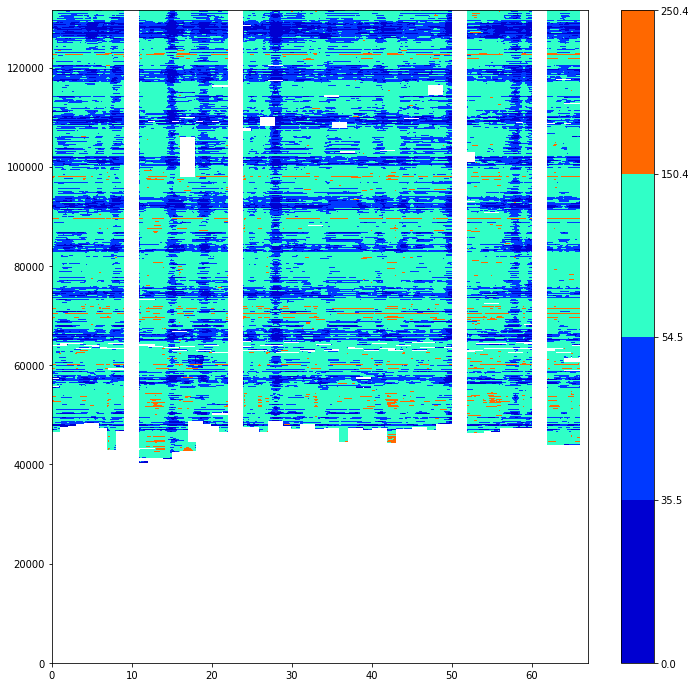

In [4]:
plt.figure(figsize=(12,12))
plt.contourf(pm25.values[:], levels=[0, 35.5, 54.5, 150.4, 250.4], cmap='jet')
#print(pm25.columns)
plt.colorbar()
aaaa=list(pm25.columns)

#print(aaaa)
#plt.xticks(np.arange(0,68,1), aaaa, rotation=90, fontproperties=font)

In [5]:

leftstation = [0]*63 
leftstation[0:10] = aaaa[0:10]
leftstation[10:22] = aaaa[11:23]
leftstation[22:49] = aaaa[24:51]
leftstation[49:58] = aaaa[52:61]
leftstation[58:63] = aaaa[62:67]
print(leftstation)
pm2506 = data.values[52608:131496,2:]
#pmleft = np.empty((78888,63))
pmleft = np.empty((87648,63))
pmleft[:,:] = np.nan
pmleft[0:78888,0:10] = pm2506[:,0:10]
pmleft[0:78888,10:22] = pm2506[:,11:23]
pmleft[0:78888,22:49] = pm2506[:,24:51]
pmleft[0:78888,49:58] = pm2506[:,52:61]
pmleft[0:78888,58:63] = pm2506[:,62:67]

leftdate = [0]*87648
aaa=list(pm25.index)
leftdate[0:78888] = aaa[52608:131496]
#print(leftdate)
#print(aaa)


['嘉義', '龍潭', '淡水', '湖口', '苗栗', '美濃', '大園', '前鎮', '基隆', '板橋', '南投', '潮州', '小港', '仁武', '花蓮', '馬祖', '崙背', '萬華', '冬山', '竹東', '松山', '沙鹿', '大寮', '頭份', '屏東', '中壢', '恆春', '新竹', '士林', '觀音', '線西', '左營', '埔里', '新店', '新莊', '永和', '菜寮', '朴子', '彰化', '汐止', '復興', '前金', '平鎮', '西屯', '林口', '桃園', '豐原', '三義', '宜蘭', '大里', '二林', '楠梓', '竹山', '橋頭', '土城', '陽明', '善化', '萬里', '新營', '斗六', '中山', '新港', '安南']


In [6]:
col2015= list(data2015.columns)

date2015 = [0]*8760
from datetime import datetime, timedelta  
testdate = data2015['date']
#print(testdate.head)
for i in range(0,8760):
 aa = datetime.strptime(testdate[i],'%Y/%m/%d')

 traa = datetime.strftime(aa,'%Y-%m-%d')
 date2015[i]=traa
#print(date2015)
pm2015 = data2015.iloc[:,0]
outdate2015=pd.DataFrame(date2015,columns=['date'])
pm2015.index = outdate2015['date']+':'+data2015['hour']
aaaa2015=list(pm2015.index)
#print(aaaa2015)
leftdate[78888:87648] = aaaa2015
#aaa = datetime.strftime(newdate,'%d%b%Y')

In [7]:

#print(pm2015)
for i in range(0,78):
 for j in range(0,63):
  if col2015[i] in leftstation[j]:
   121212 
   pmleft[78888:87648,j] = data2015.values[:,i]
#   print(col2015[i])
#  print(leftstation[j])
#plt.contourf(pmleft[80000:87648,:],cmap='jet')


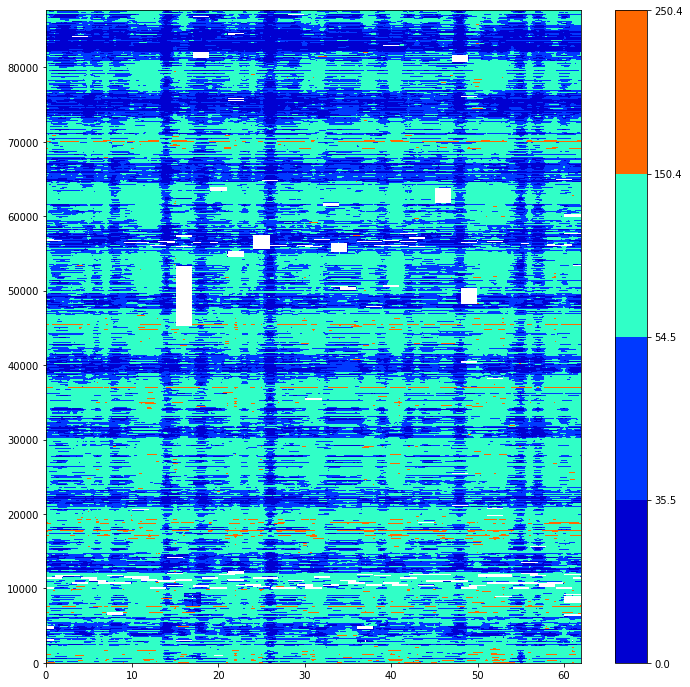

In [8]:

fig = plt.figure(figsize=(12,12))
plt.contourf(pmleft,levels=[0, 35.5, 54.5, 150.4, 250.4], cmap='jet')
plt.colorbar()

In [79]:
outputpm=pd.DataFrame(pmleft,index=leftdate,columns=leftstation)
#outputpm.head()

#pm251.index = data['date']
pm_ma24 = outputpm.rolling(24).mean()
pm_ma24.shape
#print(pm_ma24.index)

(87648, 63)

In [10]:
 # Function to compute summed air-pollution-index and cut the whole series with specified time window
def api_timeseries(outputpm, threshold=54.5, window=240):
    tmp = (outputpm>=threshold)*1
    tmp = tmp.sum(axis=1)
    ts = {}
    for i in np.arange(23+window, len(tmp), 24):
        #print('Index: '+str(i-window)+' ~ '+str(i))
        ts[tmp.index[i]] = list(tmp[i-window:i])
    df = pd.DataFrame(ts)
    return(df)

apts = api_timeseries(pm_ma24)
apts.head()


,2006-01-11:h23,2006-01-12:h23,2006-01-13:h23,2006-01-14:h23,2006-01-15:h23,2006-01-16:h23,2006-01-17:h23,2006-01-18:h23,2006-01-19:h23,2006-01-20:h23,...,2015-12-22:h23,2015-12-23:h23,2015-12-24:h23,2015-12-25:h23,2015-12-26:h23,2015-12-27:h23,2015-12-28:h23,2015-12-29:h23,2015-12-30:h23,2015-12-31:h23
0,7,11,37,43,16,0,8,12,8,10,...,0,0,0,5,46,2,0,0,1,3
1,7,12,39,43,14,0,8,12,8,10,...,0,0,0,6,44,2,0,0,1,2
2,7,12,38,43,12,0,8,12,9,10,...,0,0,0,9,42,2,0,0,1,1
3,7,12,39,43,11,0,8,12,9,10,...,0,0,0,13,37,2,0,0,1,1
4,7,13,38,42,11,1,8,12,9,11,...,0,0,0,17,33,1,0,0,1,1


In [12]:
#apts.to_csv('apts_63station.csv', index=False)

[3 3 3 ... 1 2 2]


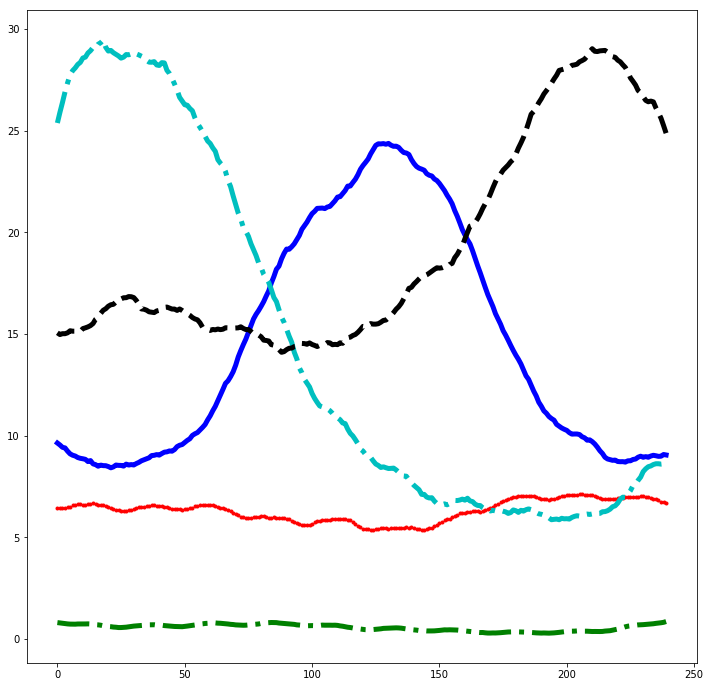

In [11]:
from sklearn.cluster import AgglomerativeClustering

data11 = pd.read_csv('apts_63station.csv')
#print(data11.head())
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
hc.fit_predict(data11.T) 

print(hc.labels_)
fig = plt.figure(figsize=(12,12))
plt.plot(data11.iloc[:,hc.labels_==0].mean(axis=1),'b-',linewidth=5)
plt.plot(data11.iloc[:,hc.labels_==1].mean(axis=1),'r.',linewidth=5)
plt.plot(data11.iloc[:,hc.labels_==2].mean(axis=1),'g-.',linewidth=5)
plt.plot(data11.iloc[:,hc.labels_==3].mean(axis=1),'c-.',linewidth=5)
plt.plot(data11.iloc[:,hc.labels_==4].mean(axis=1),'k--',linewidth=5)
#blue red green cyan brown
#plt.plot(data11.iloc[:,hc.labels_==2].mean(axis=1),color='green', linestyle='solid',linewidth=6)
#plt.plot(data11.iloc[:,hc.labels_==0].mean(axis=1),color='grey', linestyle='dashed')
#plt.plot(data11.iloc[:,hc.labels_==3].mean(axis=1),color='grey', linestyle='dashed')
#plt.plot(data11.iloc[:,hc.labels_==1].mean(axis=1),color='grey', linestyle='dashed')
#plt.plot(data11.iloc[:,hc.labels_==4].mean(axis=1),color='grey', linestyle='dashed')


In [102]:
print(hc.labels_[0,])
hr_label = np.empty((1,87648))
hr_label[:,:] = -5
#print(hr_label)
for i in range(0,3642):
 for j in range(0,24):
    hr_label[0,24*(i+1)+j]=hc.labels_[i,]
print(np.sum(hr_label == 0))
print(np.sum(hr_label == 1))
print(np.sum(hr_label == 2))
print(np.sum(hr_label == 3))
print(np.sum(hr_label == 4))
#print(hr_label[0,87300:87648])
pm_ma24.head()
station = pd.read_csv('station.csv',encoding='big5')
finalar=station.loc[:,['測站名稱','經度','緯度']]
latlon=np.empty((2,63))
#print(finalar)
for i in range(0,77):
    for j in range(0,63):
#     print(leftstation[j])
     aaaa=finalar.iloc[i,0]
     latlonaa=finalar.iloc[i,1:3]
     if leftstation[j] in aaaa:
        alltime = pm_ma24.iloc[hr_label[0,:]==3,j]
        latlon[:,j] = latlonaa
#for i in range(0,63): 
# print(pm_ma24.iloc[:,])
#plt.plot(pm_ma24.mean(axis=1))
#plt.show()
#plt.plot(data11.mean(axis=1))
#plt.show()
#print(hr_label.shape)
#print(pm_ma24.iloc[hr_label[0,:]==3,0])
stationinfo=pd.DataFrame(latlon,columns=leftstation)
stationinfo.head()

3
7464
30672
39816
3792
5664


,嘉義,龍潭,淡水,湖口,苗栗,美濃,大園,前鎮,基隆,板橋,...,橋頭,土城,陽明,善化,萬里,新營,斗六,中山,新港,安南
0,120.440833,121.216350,121.449239,121.038653,120.820200,120.530542,121.201811,120.307564,121.760056,121.458667,...,120.305689,121.451861,121.529583,120.297142,121.689881,120.317250,120.544994,121.526528,120.345531,120.218333
1,23.462778,24.863869,25.164500,24.900142,24.565269,22.883583,25.060344,22.605386,25.129167,25.012972,...,22.757506,24.982528,25.182722,23.115097,25.179667,23.305633,23.711853,25.062361,23.554839,23.048333


In [100]:
test_label = np.arange(48)
print(test_label.shape)
aaab=test_label.reshape((24,2))
print(aaab)

(48,)
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]
 [30 31]
 [32 33]
 [34 35]
 [36 37]
 [38 39]
 [40 41]
 [42 43]
 [44 45]
 [46 47]]


In [27]:
#p1 =np.where( hc.labels_ == 0 )
#p2 =np.where( hc.labels_ == 1 )
#p3 =np.where( hc.labels_ == 2 )
#p4 =np.where( hc.labels_ == 3 )
#p5 =np.where( hc.labels_ == 4 )
#print(p1[0])
#p11 = list(p1)
#p12 = list(p2)
#p13 = list(p3)
#p14 = list(p4)
#p15 = list(p5)
#all=list(hc.labels_)
#for i in range(0,3642):
 #if all[i] == 3:
  #  print(i)
#np.savetxt('outtype1.txt',(p11),fmt='%4.0i')
#np.savetxt('outtype2.txt',(p12),fmt='%4.0i')
#np.savetxt('outtype3.txt',(p14),fmt='%4.0i')
#np.savetxt('outtype4.txt',(p15),fmt='%4.0i')
#np.savetxt('outtype5.txt',(p13),fmt='%4.0i')

0
1
2
11
12
13
14
15
25
26
27
28
41
42
43
72
73
74
75
77
86
87
88
89
260
276
284
285
286
287
312
313
314
315
316
317
363
403
404
405
406
407
470
494
495
496
619
620
621
622
682
690
725
726
735
736
737
738
739
740
814
824
842
843
1032
1067
1082
1083
1104
1112
1114
1134
1135
1136
1137
1172
1173
1174
1188
1193
1194
1245
1384
1385
1386
1436
1437
1438
1451
1452
1453
1454
1462
1463
1464
1488
1489
1490
1537
1538
1539
1540
1541
1772
1802
1804
1805
1813
1814
1815
1816
1863
1865
1868
1889
1900
1901
1902
1903
1914
1915
1923
1924
1925
1926
1942
1943
1944
2070
2071
2072
2578
2579
2580
2581
2601
2609
2610
2611
2612
2874
2876
2897
2898
2899
2900
2914
2915
2923
2924
2925
2926
2939
2951
2995
2996
3322
3635
